Se han cargado 3419 imágenes.
Number of authentic images: 7437
Number of tampered images: 1628
Number of validation batches: 46
Number of test batches: 11
Epoch 1/10


C:\Users\abadd\AppData\Roaming\Python\Python311\site-packages\keras\src\backend\tensorflow\nn.py:681: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3200 - loss: 19.3912 - val_accuracy: 0.8571 - val_loss: 629.3990
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.6800 - loss: 1763.0854 - val_accuracy: 0.8571 - val_loss: 301.0522
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step - accuracy: 0.6800 - loss: 813.5684 - val_accuracy: 0.8571 - val_loss: 287.8362
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.6800 - loss: 439.1873 - val_accuracy: 0.8571 - val_loss: 63.4776
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step - accuracy: 0.6800 - loss: 157.7200 - val_accuracy: 0.8571 - val_loss: 25.3086
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step - accuracy: 0.6800 - loss: 55.4626 - val_accuracy: 0.5714 - val_loss: 77.7293
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7600 - loss: 51.8506 - val_accuracy: 0.1429 - val_loss: 77.2681
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.4400 - loss: 37.0583 - val_accuracy: 0.4286 - 

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 124, 124, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 122, 122, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 61, 61, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 119072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │    30,482,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,507,784 (349.07 MB)

 Trainable params: 30,502,594 (116.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,005,190 (232.72 MB)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Resultado de la predicción: Tampered


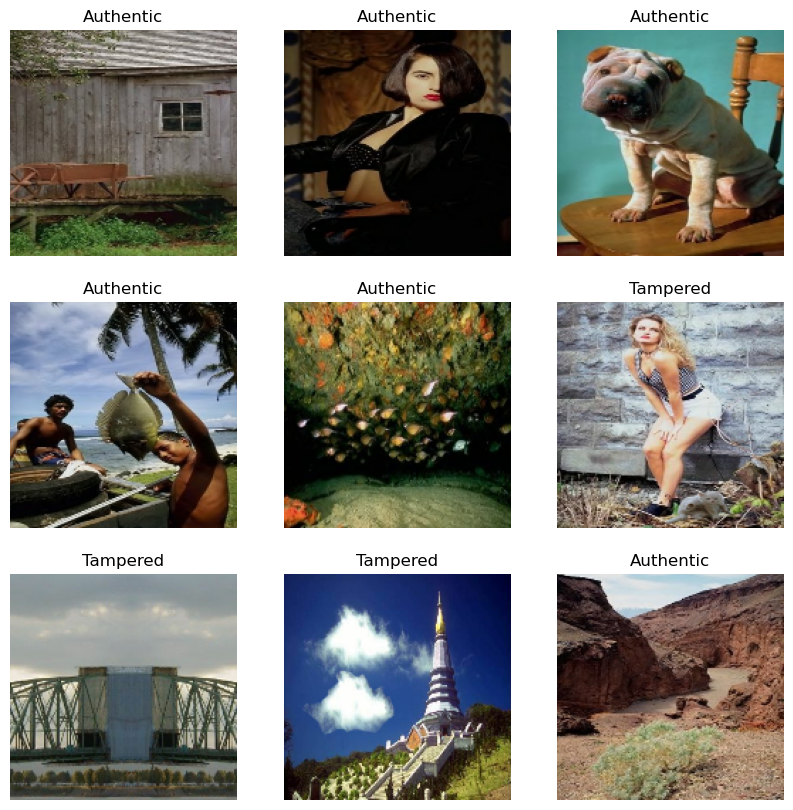

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, InputLayer
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import matplotlib.pyplot as plt

# Modelo de predicción de manipulación de imágenes
def Image_Forgery_Predictor_Model(input_shape=(128, 128, 3)):
    model = Sequential([
        InputLayer(shape=input_shape),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dense(2, activation='sigmoid')
    ])
    base_learning_rate = 0.001
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
                  loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                  metrics=['accuracy'])
    return model

# Simulación de compresión JPEG
def JPEGCompression(image, quality):
    return tf.image.adjust_jpeg_quality(image, jpeg_quality=quality)

# Preprocesamiento de imagen
def preprocess_image(image):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image_resized = tf.image.resize(image, (128, 128))
    image_compressed = JPEGCompression(image_resized, quality=75)
    image_diff = tf.subtract(image_resized, image_compressed)
    return image_diff

# Función de entrenamiento del modelo
def train_model(images, labels, epochs=10):
    model = Image_Forgery_Predictor_Model()
    training_data = [preprocess_image(image) for image in images]
    training_data = np.array(training_data)
    labels = np.array(labels)
    
    X_train, X_val, y_train, y_val = train_test_split(training_data, labels, test_size=0.2, random_state=42)
    
    y_train = tf.keras.utils.to_categorical(y_train, num_classes=2)
    y_val = tf.keras.utils.to_categorical(y_val, num_classes=2)
    
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs)
    return model, history

# Función de predicción para una imagen de entrada
def predict_image(model, input_image):
    input_diff_image = preprocess_image(input_image)
    input_diff_image = np.expand_dims(input_diff_image, axis=0)
    predicted_label = model.predict(input_diff_image)
    return "Tampered" if predicted_label[0][0] > predicted_label[0][1] else "Untampered"

# Cargar y preprocesar las imágenes del dataset CASIA2
def get_file_list_and_labels(directory, label):
    file_list = []
    labels = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                file_list.append(os.path.join(root, file))
                labels.append(label)
    return file_list, labels

def create_dataset(file_list, labels):
    labels = np.array(labels)
    ds = tf.data.Dataset.from_tensor_slices((file_list, labels))
    ds = ds.map(lambda x, y: (tf.io.read_file(x), y))
    ds = ds.map(lambda x, y: (tf.image.decode_jpeg(x, channels=3), y))
    ds = ds.map(lambda x, y: (tf.image.resize(x, IMG_SIZE), y))
    return ds.shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE)

# Configuraciones del dataset
PATH = '../data/CASIA2'
authentic_dir = os.path.join(PATH, 'Au')
tampered_dir = os.path.join(PATH, 'Tp')
BATCH_SIZE = 32
IMG_SIZE = (160, 160)

authentic_files, authentic_labels = get_file_list_and_labels(authentic_dir, 0)
tampered_files, tampered_labels = get_file_list_and_labels(tampered_dir, 1)
all_files = authentic_files + tampered_files
all_labels = authentic_labels + tampered_labels

train_files, val_files, train_labels, val_labels = train_test_split(
    all_files, all_labels, test_size=0.2, random_state=42, stratify=all_labels
)

train_dataset = create_dataset(train_files, train_labels)
validation_dataset = create_dataset(val_files, val_labels)

# Cargar imágenes TIFF
def load_tif_image(file_path):
    image = Image.open(file_path)
    image_array = np.array(image)
    return tf.convert_to_tensor(image_array)

def load_images_from_directory(directory_path):
    images = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".tif") or filename.endswith(".tiff"):
            image_path = os.path.join(directory_path, filename)
            image_tensor = load_tif_image(image_path)
            resized = tf.image.resize(image_tensor, IMG_SIZE)
            images.append(resized)
        elif filename.endswith(".jpg") or filename.endswith(".jpeg") or filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            image_tensor = tf.io.read_file(image_path)
            image_tensor = tf.image.decode_image(image_tensor)
            images.append(image_tensor)
    return images

# Directorio donde se encuentran las imágenes
directory_path = '../data/CASIA2/Tp'

# Cargar las imágenes
images = load_images_from_directory(directory_path)
print(f'Se han cargado {len(images)} imágenes.')

# Verificar las imágenes cargadas
print("Number of authentic images:", len(authentic_files))
print("Number of tampered images:", len(tampered_files))

# Visualización de algunas imágenes
class_names = ['Authentic', 'Tampered']
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Dividir el conjunto de validación para crear un conjunto de prueba
val_batches = tf.data.experimental.cardinality(validation_dataset)
test_dataset = validation_dataset.take(val_batches // 5)
validation_dataset = validation_dataset.skip(val_batches // 5)

print('Number of validation batches: %d' % tf.data.experimental.cardinality(validation_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

# Entrenamiento del modelo
model, history = train_model(images, labels, epochs=10)
model.summary()

# Predicción de una imagen de entrada
input_image = images[0]  # Ejemplo de imagen de entrada
result = predict_image(model, input_image)
print("Resultado de la predicción:", result)


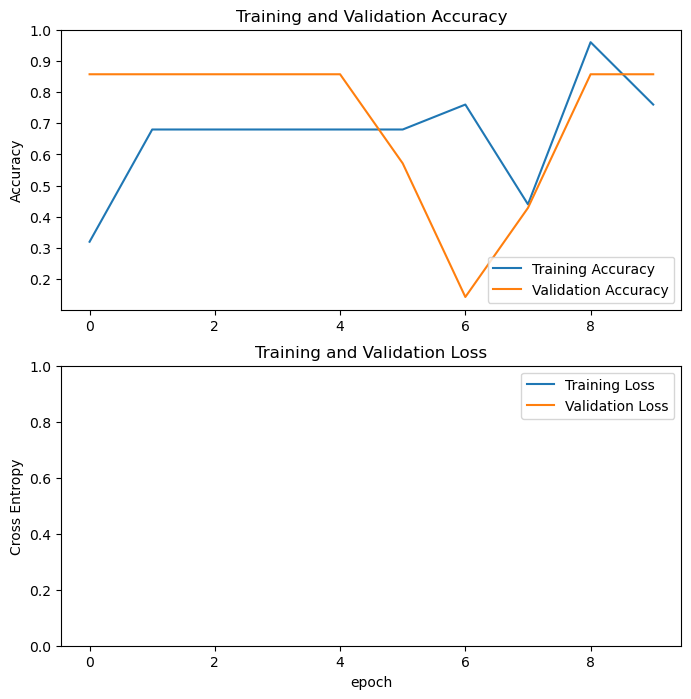

In [9]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [11]:
# Evaluar en el conjunto de prueba
results = model.evaluate(test_dataset)

# Imprimir métricas
print("Test loss:", results[0])
print("Test accuracy:", results[1])

ValueError: Exception encountered when calling Sequential.call().

[1mInput 0 of layer "dense_4" is incompatible with the layer: expected axis -1 of input shape to have value 119072, but received input with shape (None, 189728)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(None, 160, 160, 3), dtype=float32)
  • training=False
  • mask=None